## Linear Regression using Gradient Descent

<b>Data set:</b> (https://www.kaggle.com/datasets/thedevastator/uncovering-factors-that-affect-used-car-prices)


##### This project is to compare the results of the Java project.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns

In [3]:
# Import the data set
data = pd.read_csv("./data/autos.csv")
# Get info on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

In [4]:
#Create column that represents the age of the vehicle
vehicleAge = []
for num in data["yearOfRegistration"]:
    vehicleAge.append(2023 - num)

data['vehicleAge'] = vehicleAge


In [5]:
#Convert kilometers to miles
miles = []
for num in data["kilometer"]:
    miles.append(round(num*0.62))

data['miles'] = miles

In [6]:
data.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,vehicleAge,miles
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,30,93000
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,12,77500
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,19,77500
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,22,93000
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,15,55800


In [7]:
#Drop features that are not needed
data.drop(['index', 'dateCrawled', 'name', 'offerType', 'seller', 'abtest', 'yearOfRegistration', 'kilometer', 'monthOfRegistration', 
           'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen', 'model'], axis=1, inplace=True)

data.head()

,price,vehicleType,gearbox,powerPS,fuelType,brand,vehicleAge,miles
0,480,NaN,manuell,0,benzin,volkswagen,30,93000
1,18300,coupe,manuell,190,diesel,audi,12,77500
2,9800,suv,automatik,163,diesel,jeep,19,77500
3,1500,kleinwagen,manuell,75,benzin,volkswagen,22,93000
4,3600,kleinwagen,manuell,69,diesel,skoda,15,55800


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   price        371528 non-null  int64 
 1   vehicleType  333659 non-null  object
 2   gearbox      351319 non-null  object
 3   powerPS      371528 non-null  int64 
 4   fuelType     338142 non-null  object
 5   brand        371528 non-null  object
 6   vehicleAge   371528 non-null  int64 
 7   miles        371528 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 22.7+ MB


In [9]:
#Drop all Null values
data.dropna(inplace=True)

#Drop any outliers in the vehicleAge column
data.drop(data[(data['vehicleAge'] < 0) | (data['vehicleAge'] > 50)].index, inplace=True)

data.drop(data[(data['price'] > 300000) | (data['price'] < 5000)].index, inplace=True)

In [10]:
#Create a CSV from the training data
#training_data.to_csv('training_data.csv')

In [11]:
data.head(20)

,price,vehicleType,gearbox,powerPS,fuelType,brand,vehicleAge,miles
1,18300,coupe,manuell,190,diesel,audi,12,77500
2,9800,suv,automatik,163,diesel,jeep,19,77500
8,14500,bus,manuell,125,benzin,ford,9,18600
14,17999,suv,manuell,190,diesel,nissan,12,43400
18,7550,bus,manuell,136,diesel,ford,16,93000
20,10400,coupe,manuell,160,benzin,volkswagen,14,62000
27,6900,limousine,manuell,99,benzin,honda,15,37200
33,18000,limousine,automatik,218,benzin,bmw,16,12400
38,11900,andere,manuell,129,diesel,volkswagen,21,93000
42,12500,limousine,automatik,231,diesel,bmw,17,93000


In [12]:
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117774 entries, 1 to 371527
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   price        117774 non-null  int64 
 1   vehicleType  117774 non-null  object
 2   gearbox      117774 non-null  object
 3   powerPS      117774 non-null  int64 
 4   fuelType     117774 non-null  object
 5   brand        117774 non-null  object
 6   vehicleAge   117774 non-null  int64 
 7   miles        117774 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 8.1+ MB


,price,vehicleType,gearbox,powerPS,fuelType,brand,vehicleAge,miles
count,117774.000000,117774,117774,117774.000000,117774,117774,117774.000000,117774.000000
unique,NaN,8,2,NaN,7,39,NaN,NaN
top,NaN,limousine,manuell,NaN,benzin,volkswagen,NaN,NaN
freq,NaN,34450,74605,NaN,58373,24221,NaN,NaN
mean,13001.317897,NaN,NaN,162.187342,NaN,NaN,15.556608,65901.097865
std,10898.522872,NaN,NaN,175.461508,NaN,NaN,5.543226,28547.117622
min,5000.000000,NaN,NaN,0.000000,NaN,NaN,6.000000,3100.000000
25%,6998.250000,NaN,NaN,113.000000,NaN,NaN,12.000000,43400.000000
50%,9900.000000,NaN,NaN,150.000000,NaN,NaN,15.000000,77500.000000
75%,15300.000000,NaN,NaN,190.000000,NaN,NaN,17.000000,93000.000000


Distribution of vehicle type


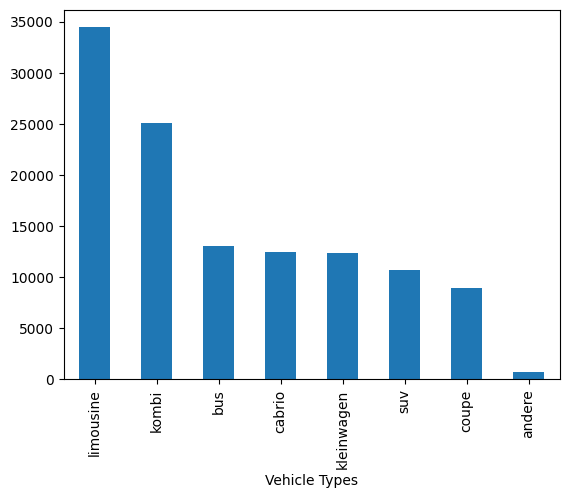

In [13]:
data['vehicleType'].value_counts().plot(kind='bar', xlabel="Vehicle Types")
print("Distribution of vehicle type")

Distribution of vehicle models


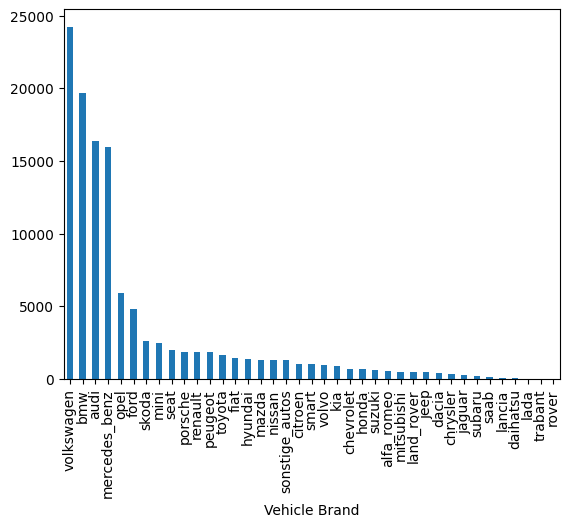

In [14]:
data['brand'].value_counts().plot(kind='bar', xlabel="Vehicle Brand")
print("Distribution of vehicle models")

Distribution of vehicle Fuel Types


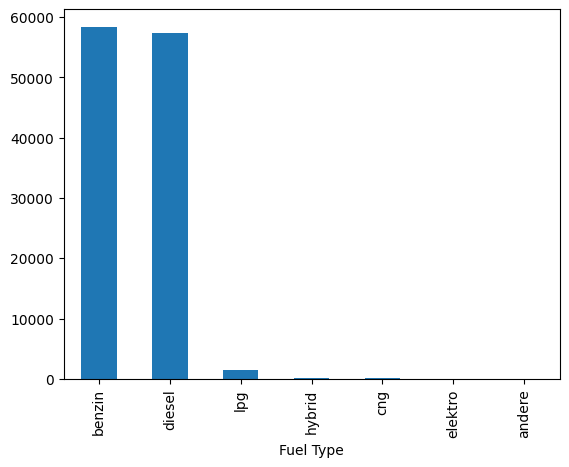

In [15]:
data['fuelType'].value_counts().plot(kind='bar', xlabel="Fuel Type")
print("Distribution of vehicle Fuel Types")

In [16]:
#Catagorize objects into numerical values
columns = ['vehicleType', 'gearbox', 'fuelType', 'brand']

le = LabelEncoder()

for feature in columns:
    data[feature] = le.fit_transform(data[feature])

In [17]:
data.head(20)

,price,vehicleType,gearbox,powerPS,fuelType,brand,vehicleAge,miles
1,18300,3,1,190,3,1,12,77500
2,9800,7,0,163,3,13,19,77500
8,14500,1,1,125,1,9,9,18600
14,17999,7,1,190,3,22,12,43400
18,7550,1,1,136,3,9,16,93000
20,10400,3,1,160,1,37,14,62000
27,6900,6,1,99,1,10,15,37200
33,18000,6,0,218,1,2,16,12400
38,11900,0,1,129,3,37,21,93000
42,12500,6,0,231,3,2,17,93000


The below heat map shows a correlation between features. powerPs and fuelType provide the most infuence towards the price of the car.


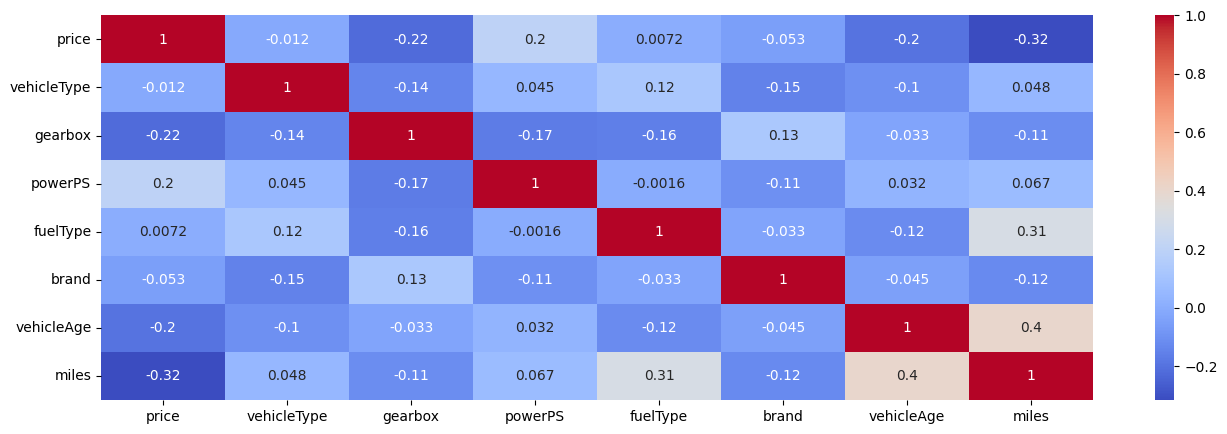

In [18]:
plt.figure(figsize=(16,5))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
print("The below heat map shows a correlation between features. powerPs and fuelType provide the most infuence towards the price of the car.")

In [29]:
target_y = data['price']
training_data = data[['powerPS', 'vehicleAge', 'miles', 'brand']]

training_data.head()

,powerPS,vehicleAge,miles,brand
1,190,12,77500,1
2,163,19,77500,13
8,125,9,18600,9
14,190,12,43400,22
18,136,16,93000,9


In [30]:
target_y.head()

1     18300
2      9800
8     14500
14    17999
18     7550
Name: price, dtype: int64